# Classifying using a perceptron

In this example, we will build a perceptron to learn a classification between positive and negative numbers.

The problem is summarised as:

**number -> perceptron -> is it positive? yes (1) / no (0)**

This is trivial but we will be able to see the code so we are familiar for more complex problems later-on.

### Set-up (installing and importing)

In [5]:
!pip install tensorflow numpy matplotlib

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Download data

In [6]:
!wget -O x.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/intro_to_dl_example/x.txt
!wget -O y.txt https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/intro_to_dl_example/y.txt

--2026-01-19 13:00:50--  https://github.com/s-sd/EMS741/raw/refs/heads/main/tutorials/intro_to_dl_example/x.txt
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/intro_to_dl_example/x.txt [following]
--2026-01-19 13:00:50--  https://raw.githubusercontent.com/s-sd/EMS741/refs/heads/main/tutorials/intro_to_dl_example/x.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25481 (25K) [text/plain]
Saving to: ‘x.txt’

x.txt               100%[===================>]  24.88K  --.-KB/s    in 0.001s  

2026-01-19 13:00:50 (18.8 MB/s) - ‘x.txt’ saved [25481/25481]

--2026

### Check the data

In [7]:
!ls

sample_data  x.txt  y.txt


In [20]:
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')

In [21]:
print('X shape: ', np.shape(x))
print('Y shape: ', np.shape(y))

print('\n')
print('X min: ', np.amin(x))
print('X max: ', np.amax(x))

print('\n')
print('Y min: ', np.amin(y))
print('Y max: ', np.amax(y))
print('\n')


# plot some samples
sample_indexes = np.random.randint(0, len(y), 16)

x_samples = x[sample_indexes]
y_samples = y[sample_indexes]

for i in range(len(x_samples)):
  print('Input: ', x_samples[i], ', Label: ', y_samples[i])

X shape:  (1000,)
Y shape:  (1000,)


X min:  -1996.0
X max:  1996.0


Y min:  0.0
Y max:  1.0


Input:  1964.0 , Label:  1.0
Input:  966.0 , Label:  1.0
Input:  436.0 , Label:  1.0
Input:  68.0 , Label:  1.0
Input:  -1564.0 , Label:  0.0
Input:  -273.0 , Label:  0.0
Input:  -708.0 , Label:  0.0
Input:  -1156.0 , Label:  0.0
Input:  1623.0 , Label:  1.0
Input:  182.0 , Label:  1.0
Input:  710.0 , Label:  1.0
Input:  1877.0 , Label:  1.0
Input:  544.0 , Label:  1.0
Input:  1601.0 , Label:  1.0
Input:  1702.0 , Label:  1.0
Input:  965.0 , Label:  1.0


In [36]:
# now let's squish/ normalise the x values to between 0 to 1 assuming min, max of -2000, +2000
# this helps tokeep the weights stable during leanring

min_x = -2000
max_x = 2000

x_normalised = (x - min_x) / (max_x - min_x)

print('\n')
print('X_normalised min: ', np.amin(x_normalised))
print('X_normalised max: ', np.amax(x_normalised))




X_normalised min:  0.001
X_normalised max:  0.999


### Split the data into relevant sets

In [45]:
# Shuffle the data randomly
indexes = np.random.permutation(len(x))
x_final = x_normalised[indexes]
y_final = y[indexes]

# split into train, val and test sets
train_val_test_ratio = [0.6, 0.2, 0.2]

train_index_start = 0
train_index_end = int(train_val_test_ratio[0] * len(x))

val_index_start = train_index_end
val_index_end = val_index_start + int(train_val_test_ratio[1] * len(x))

test_index_start = val_index_end
test_index_end = test_index_start + int(train_val_test_ratio[2] * len(x))


x_train, y_train = x_final[train_index_start:train_index_end], y_final[train_index_start:train_index_end]

x_val, y_val = x_final[val_index_start:val_index_end], y_final[val_index_start:val_index_end]

x_test, y_test = x_final[test_index_start:test_index_end], y_final[test_index_start:test_index_end]


print("Train:", x_train.shape, y_train.shape)
print("Val:", x_val.shape, y_val.shape)
print("Test: ", x_test.shape,  y_test.shape)


Train: (600,) (600,)
Val: (200,) (200,)
Test:  (200,) (200,)


### Build a perceptron

y = f(x; w)

Where we apply non-linear activation to the element-wise multiplication of w and x, which is a single perceptron. Note that the bias term is added automatically.

In [74]:
inputs = tf.keras.Input(shape=(1,))
perceptron = tf.keras.layers.Dense(1, activation="sigmoid")(inputs)
outputs = perceptron

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=16,
    validation_data=(x_val, y_val),
    verbose=1
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8610 - loss: 0.5753 - val_accuracy: 0.9450 - val_loss: 0.3814
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9467 - loss: 0.3513 - val_accuracy: 0.9850 - val_loss: 0.2734
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9780 - loss: 0.2671 - val_accuracy: 0.9800 - val_loss: 0.2177
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.2159 - val_accuracy: 0.9900 - val_loss: 0.1862
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.1780 - val_accuracy: 0.9850 - val_loss: 0.1634
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9946 - loss: 0.1734 - val_accuracy: 0.9800 - val_loss: 0.1474
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9855 - loss: 0.1518 - val_accuracy: 0.9900 - val_loss: 0.1354
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.1399 - val_accuracy: 1.0000 - val_loss

### Plotting losses

In [76]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0, 0.5, 'loss')

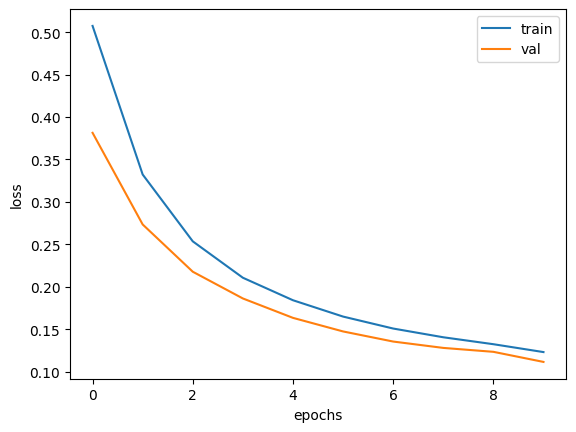

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train', 'val'])
plt.xlabel('epochs')
plt.ylabel('loss')

### Evalute the model

In [80]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")

w, b = model.get_weights()
print("Learned weight:", float(w[0, 0]))
print("Learned bias:  ", float(b[0]))

Test accuracy: 0.990
Learned weight: 13.522904396057129
Learned bias:   -6.572179317474365
